In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('/content/sao-paulo-properties-april-2019.csv')

In [3]:
dados.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
dados.shape

(13640, 16)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [6]:
dados.describe().round(2)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00,13640.00
mean,287737.78,689.88,84.37,2.31,2.07,0.98,1.39,0.35,0.15,0.51,0.02,-22.08,-43.60
std,590821.42,757.65,58.44,0.78,0.96,0.83,0.83,0.48,0.35,0.50,0.12,5.87,11.49
min,480.00,0.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-46.75,-58.36
25%,1858.75,290.00,50.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,-23.59,-46.68
50%,8100.00,500.00,65.00,2.00,2.00,1.00,1.00,0.00,0.00,1.00,0.00,-23.55,-46.64
75%,360000.00,835.00,94.00,3.00,2.00,1.00,2.00,1.00,0.00,1.00,0.00,-23.52,-46.56
max,10000000.00,9500.00,880.00,10.00,8.00,6.00,9.00,1.00,1.00,1.00,1.00,0.00,0.00


In [7]:
# Correlação entre todo os dados
corr = dados.drop(['District', 'Negotiation Type', 'Property Type'], axis=1)

corr = corr.corr().round(2)
corr

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.00,0.20,0.38,0.27,0.34,0.31,0.34,0.10,-0.01,0.13,0.03,-0.02,-0.02
Condo,0.20,1.00,0.76,0.45,0.54,0.54,0.63,0.00,0.10,0.16,-0.08,-0.03,-0.03
Size,0.38,0.76,1.00,0.66,0.68,0.68,0.74,0.01,0.03,0.13,-0.05,-0.04,-0.04
Rooms,0.27,0.45,0.66,1.00,0.55,0.53,0.59,0.04,-0.05,0.16,-0.01,-0.05,-0.05
Toilets,0.34,0.54,0.68,0.55,1.00,0.91,0.69,0.18,0.08,0.26,-0.03,-0.14,-0.14
Suites,0.31,0.54,0.68,0.53,0.91,1.00,0.70,0.14,0.07,0.27,-0.04,-0.14,-0.14
Parking,0.34,0.63,0.74,0.59,0.69,0.70,1.00,0.05,0.08,0.29,-0.02,-0.06,-0.06
Elevator,0.10,0.00,0.01,0.04,0.18,0.14,0.05,1.00,0.07,0.20,0.17,-0.13,-0.12
Furnished,-0.01,0.10,0.03,-0.05,0.08,0.07,0.08,0.07,1.00,0.15,-0.05,-0.02,-0.02
Swimming Pool,0.13,0.16,0.13,0.16,0.26,0.27,0.29,0.20,0.15,1.00,0.01,-0.04,-0.04


In [8]:
corr["Price"].to_frame()

,Price
Price,1.00
Condo,0.20
Size,0.38
Rooms,0.27
Toilets,0.34
Suites,0.31
Parking,0.34
Elevator,0.10
Furnished,-0.01
Swimming Pool,0.13


In [9]:
# Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

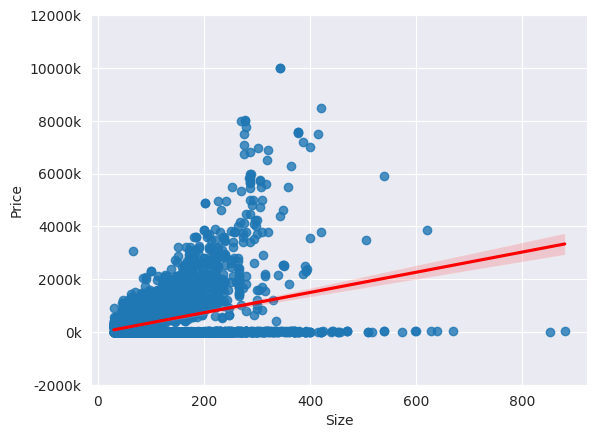

In [10]:
sns.set_style("darkgrid")
sns.regplot(x="Size", y="Price", data=dados, line_kws={'color':'red'})
plt.yticks(plt.yticks()[0], [f'{int(x/1000)}k' for x in plt.yticks()[0]])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


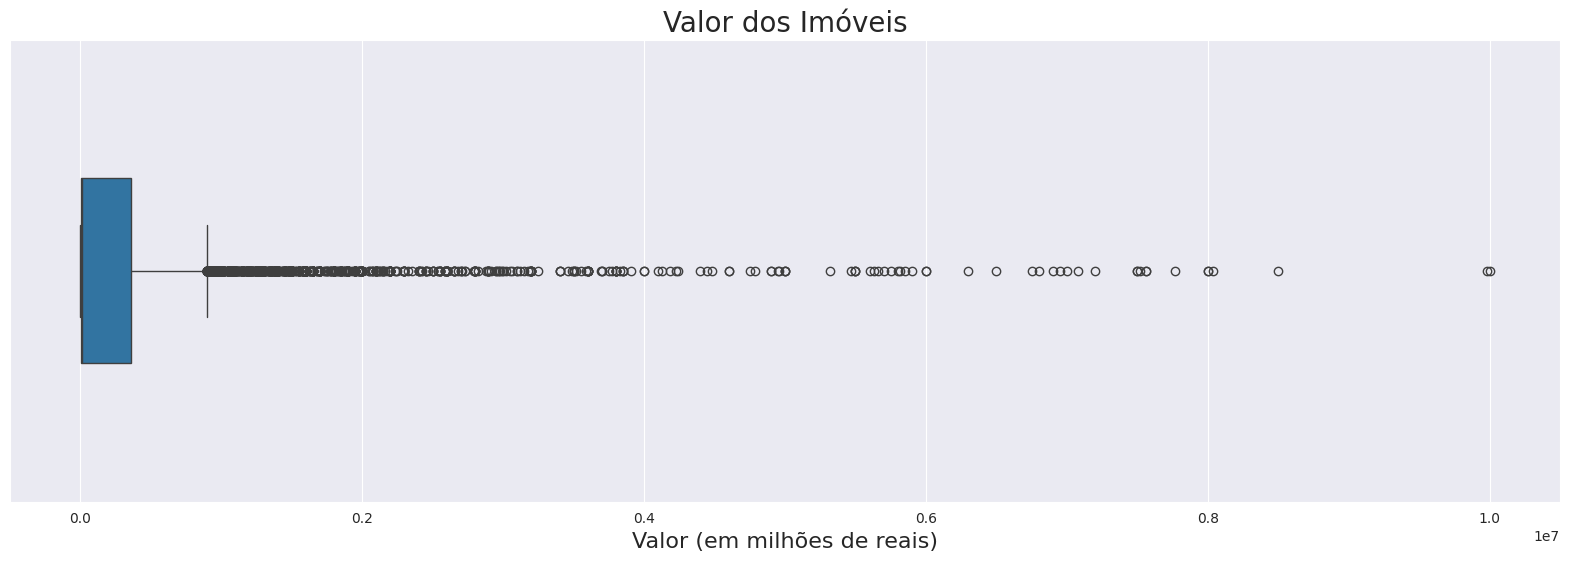

In [11]:
ax = sns.boxplot(dados, x ="Price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos Imóveis', fontsize=20)
ax.set_xlabel('Valor (em milhões de reais)', fontsize=16)
plt.show()

In [12]:
dados['Price'].describe().round(2)

,Price
count,13640.00
mean,287737.78
std,590821.42
min,480.00
25%,1858.75
50%,8100.00
75%,360000.00
max,10000000.00


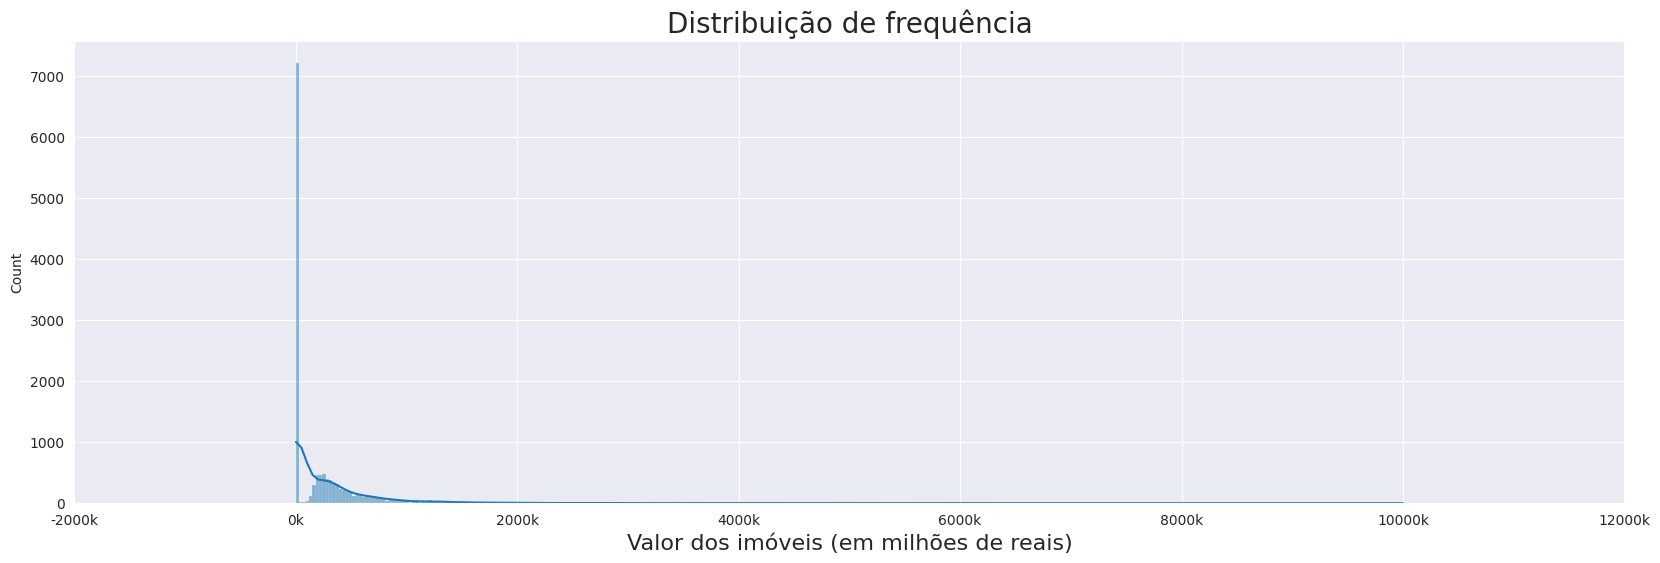

In [13]:
ax = sns.histplot(dados['Price'], kde=True)

ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Valor dos imóveis (em milhões de reais)', fontsize=16)
plt.xticks(plt.xticks()[0], [f'{int(x/1000)}k' for x in plt.xticks()[0]])
plt.show()

In [14]:
# Filter the DataFrame based on the condition.
dados = dados[(dados['Price'] >= 50000) & (dados['Price'] <= 1000000)]
dados.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
1589,50000,6800,598,4,7,4,6,1,0,1,0,Alto de Pinheiros/São Paulo,rent,apartment,-23.550690,-46.721691
3408,50000,5500,670,5,6,5,7,0,0,1,0,Campo Belo/São Paulo,rent,apartment,-23.625617,-46.674614
3732,50000,6100,349,4,5,4,5,0,0,1,0,Jardim Paulista/São Paulo,rent,apartment,-23.572635,-46.658955
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594


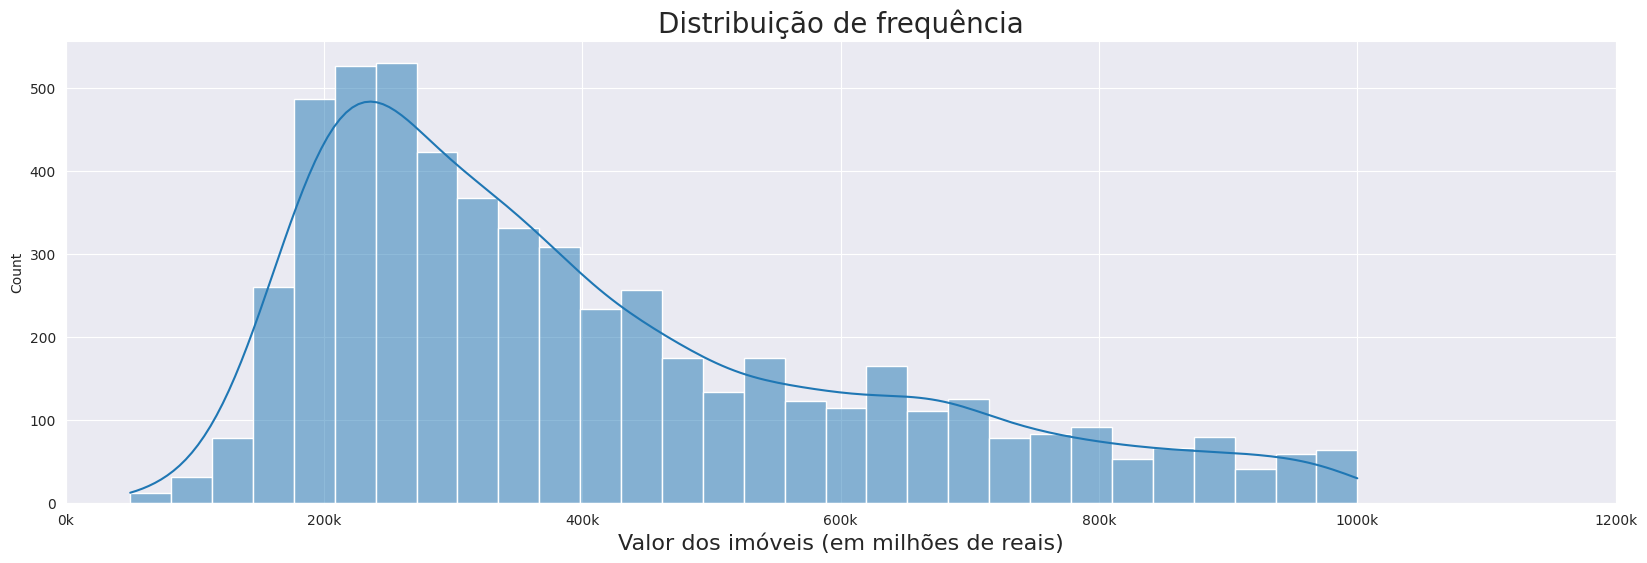

In [15]:
ax = sns.histplot(dados['Price'], kde=True)


ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Valor dos imóveis (em milhões de reais)', fontsize=16)
plt.xticks(plt.xticks()[0], [f'{int(x/1000)}k' for x in plt.xticks()[0]])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


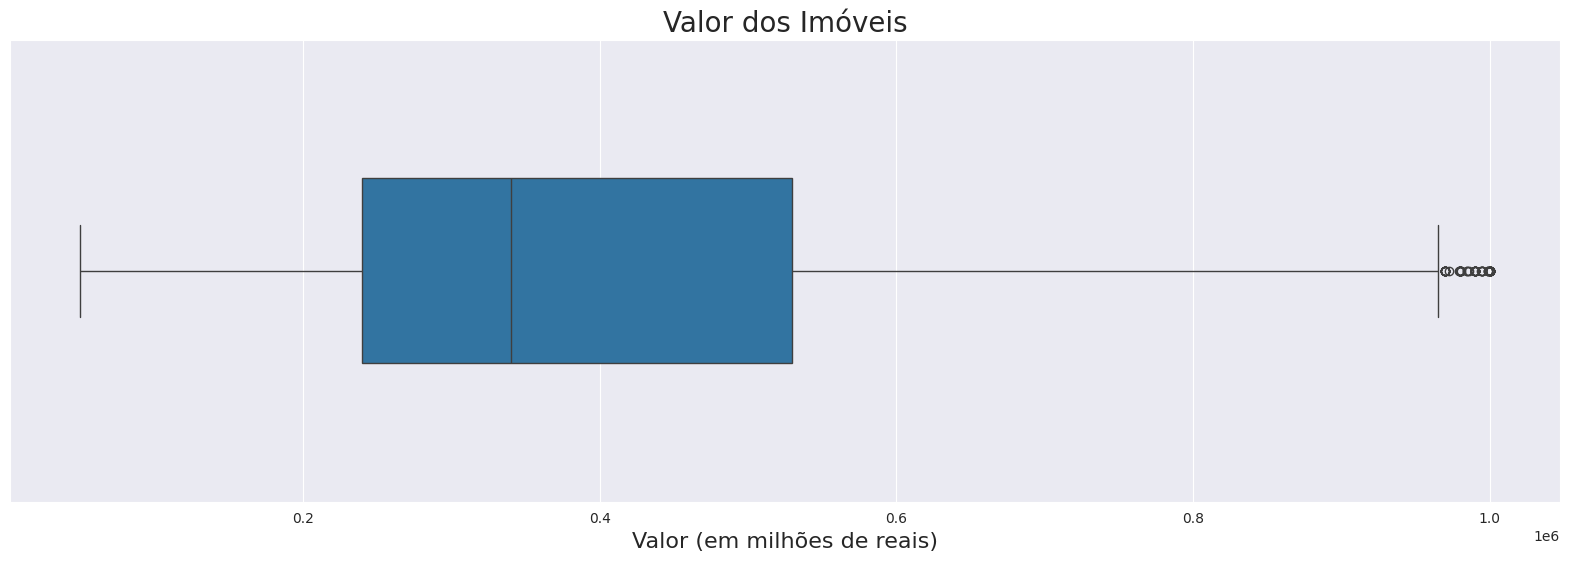

In [16]:
ax = sns.boxplot(dados, x ="Price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos Imóveis', fontsize=20)
ax.set_xlabel('Valor (em milhões de reais)', fontsize=16)
plt.show()

In [17]:
dados['log_Price'] = np.log(dados['Price'])

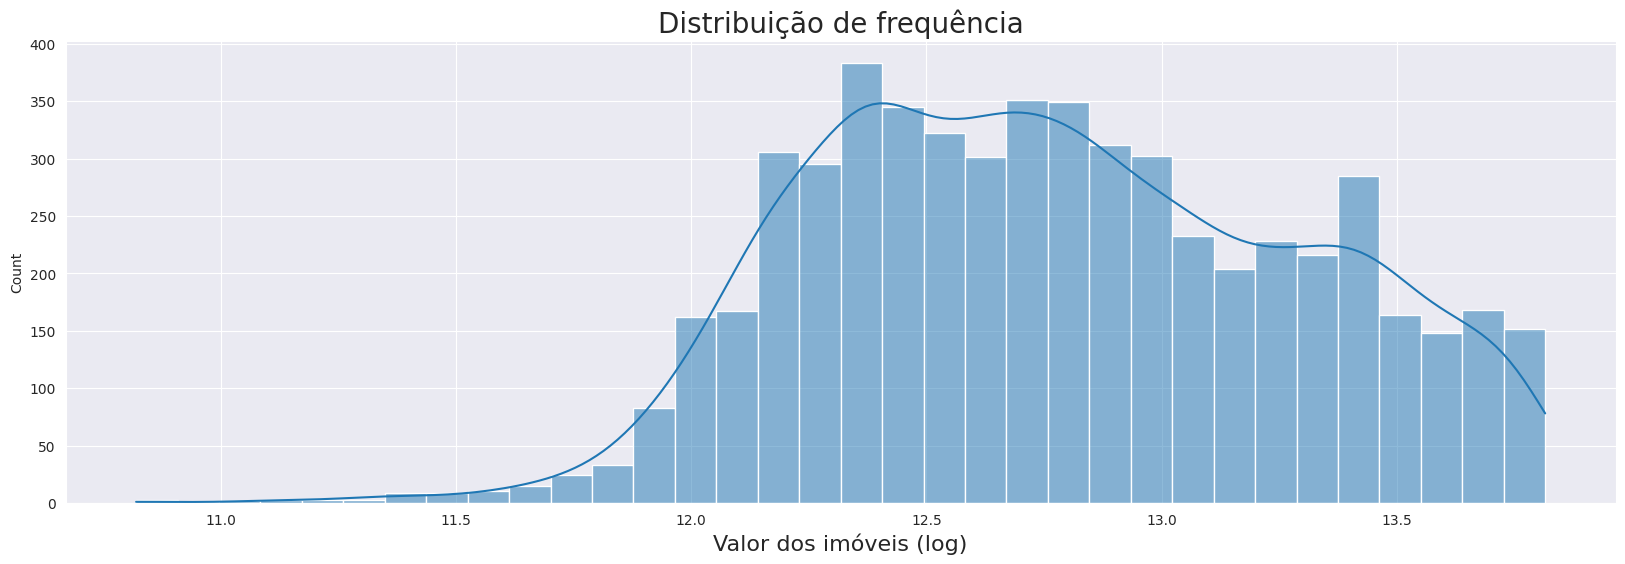

In [18]:
ax = sns.histplot(dados['log_Price'], kde=True)


ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Valor dos imóveis (log)', fontsize=16)
#plt.xticks(plt.xticks()[0], [f'{int(x/1000)}k' for x in plt.xticks()[0]])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


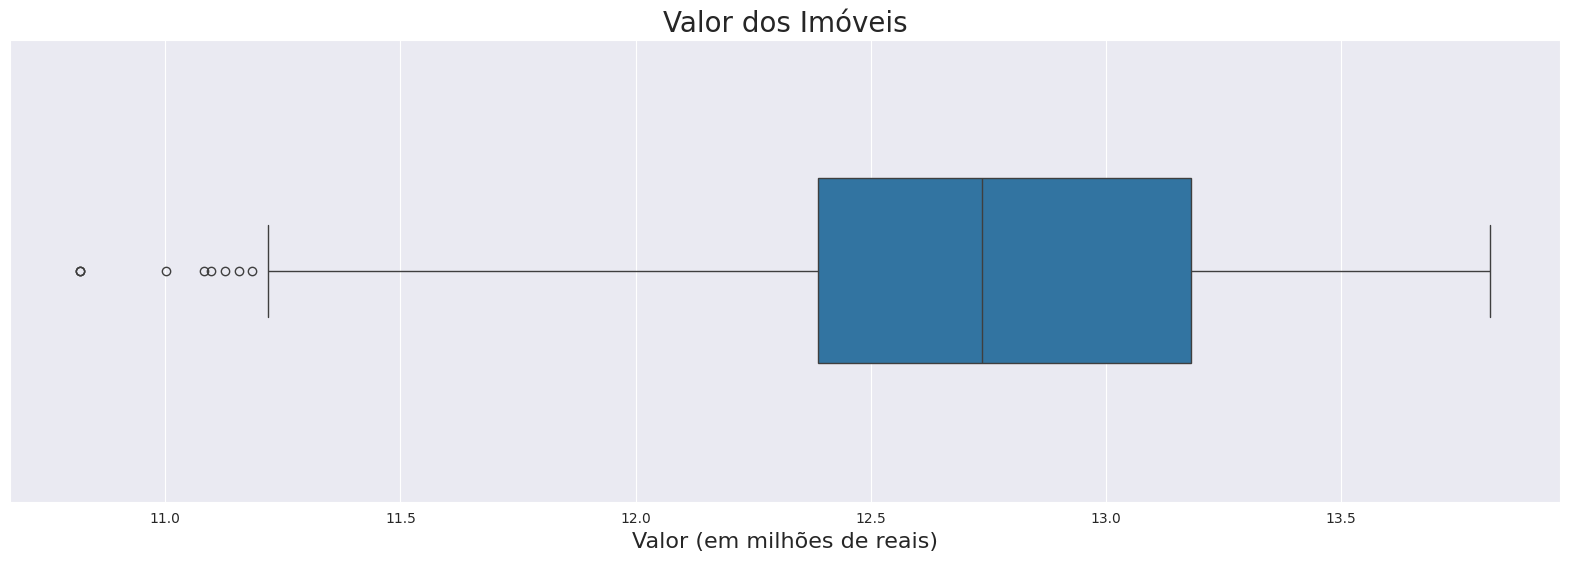

In [19]:
ax = sns.boxplot(dados, x ="log_Price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos Imóveis', fontsize=20)
ax.set_xlabel('Valor (em milhões de reais)', fontsize=16)
plt.show()

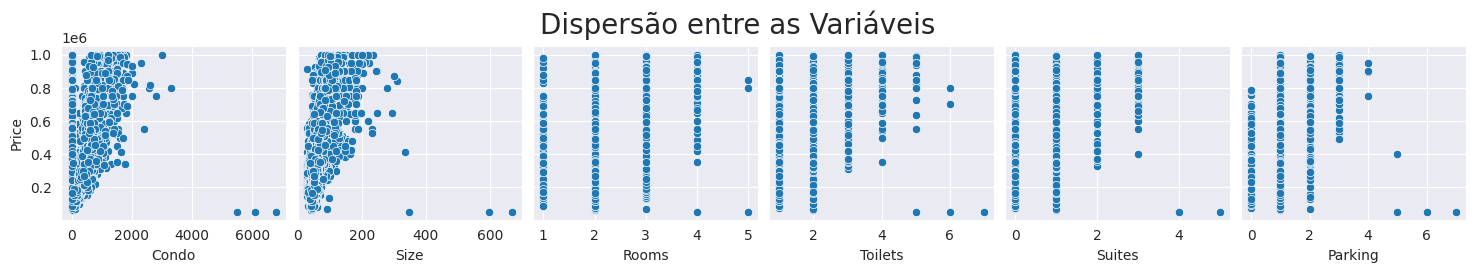

In [20]:
# Pairplot sem reta de regressão
bx = sns.pairplot(dados, y_vars="Price", x_vars= ['Condo', 'Size','Rooms', 'Toilets', 'Suites', 'Parking'])
bx.figure.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

In [21]:
dados['log_Condo'] = np.log(dados['Condo'])
dados['log_Size'] = np.log(dados['Size'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
np.isinf(dados['log_Condo']).any()

True

In [23]:
dados.replace([np.inf, -np.inf], np.nan, inplace=True)
dados.dropna(inplace=True)

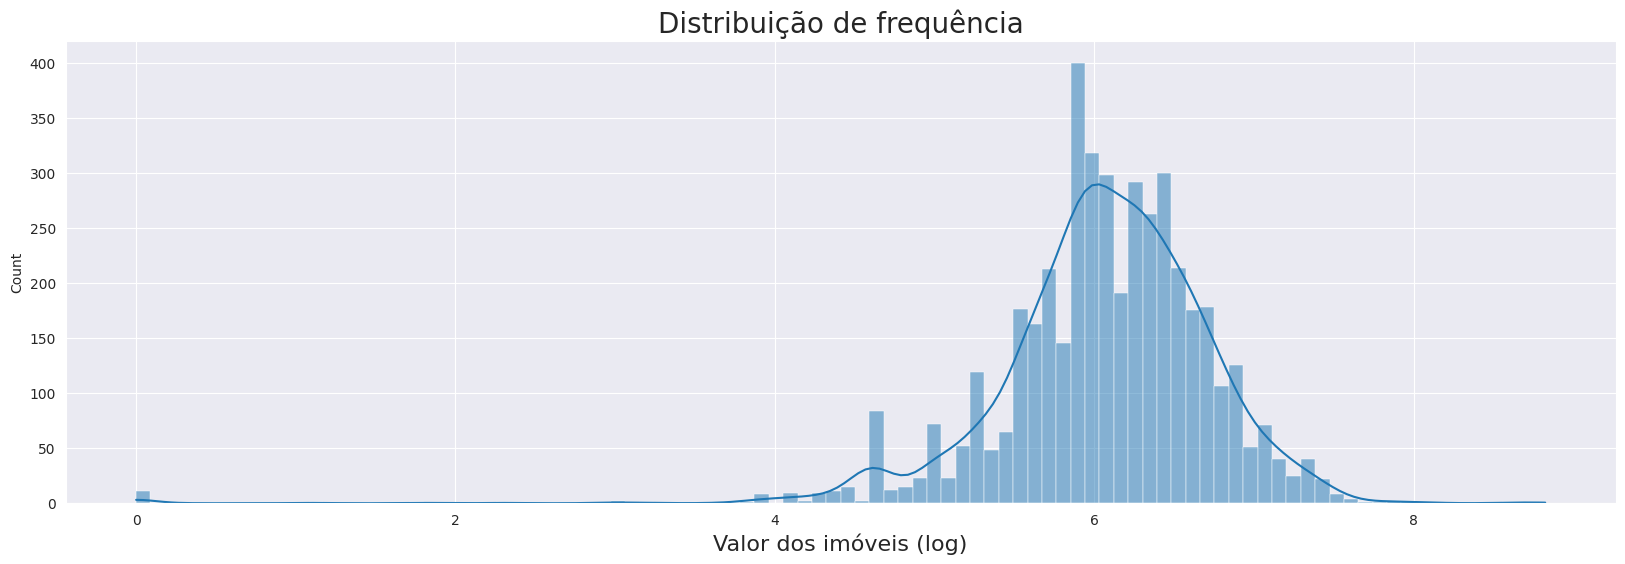

In [24]:
ax = sns.histplot(dados['log_Condo'], kde=True)


ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Valor dos imóveis (log)', fontsize=16)
#plt.xticks(plt.xticks()[0], [f'{int(x/1000)}k' for x in plt.xticks()[0]])
plt.show()

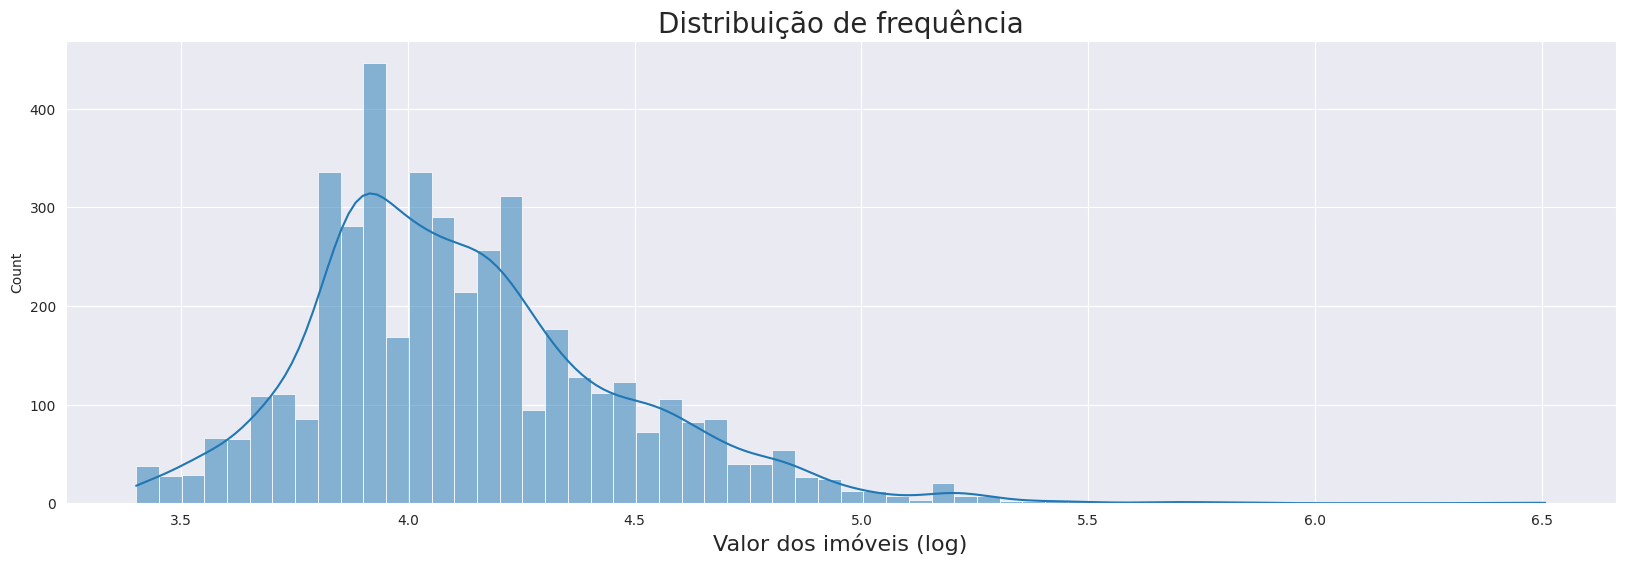

In [25]:
ax = sns.histplot(dados['log_Size'], kde=True)


ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Valor dos imóveis (log)', fontsize=16)
#plt.xticks(plt.xticks()[0], [f'{int(x/1000)}k' for x in plt.xticks()[0]])
plt.show()

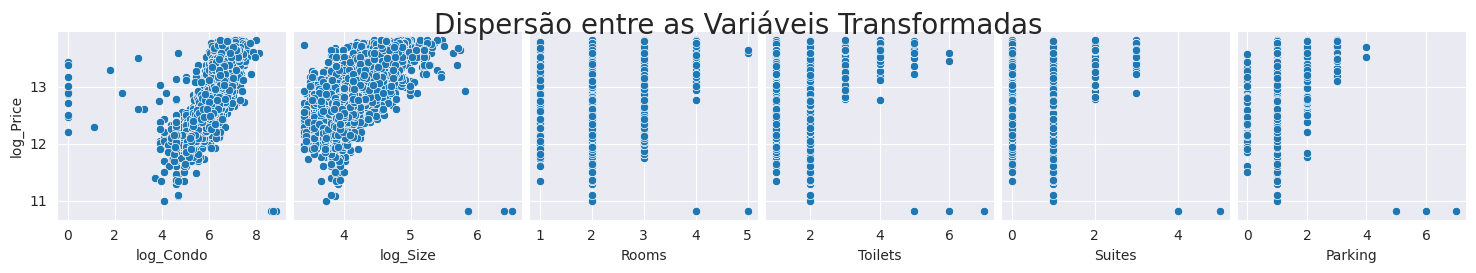

In [26]:
ax = sns.pairplot(dados, y_vars="log_Price", x_vars= ['log_Condo', 'log_Size',
                                                      'Rooms', 'Toilets', 'Suites', 'Parking'])
ax.figure.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = dados[['log_Condo', 'log_Size', 'Rooms', 'Toilets', 'Suites', 'Parking']]
y = dados['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [30]:
import statsmodels.api as sm

In [31]:
X_train_com_constante = sm.add_constant(X_train)

In [32]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1065.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:20:57   Log-Likelihood:                -40643.
No. Observations:                3094   AIC:                         8.130e+04
Df Residuals:                    3087   BIC:                         8.134e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.62e+06   3.19e+04    -50.749      0.0

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
# Atualizando as variáveis de entrada do modelo
X_train_novo = X_train.drop('Suites', axis=1)
X_test_novo = X_test.drop('Suites', axis=1)

In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(X_train_novo, y_train)

LinearRegression()

In [37]:
print(f"R² = {modelo.score(X_train_novo, y_train)}")

R² = 0.6737216188263351


In [38]:
y_previsto = modelo.predict(X_test_novo)

In [39]:
print(f"R² = {metrics.r2_score(y_test, y_previsto)}")

R² = 0.5607841262566793


Apesar do R² do treino nao ter sido tao alto houve overfit comparado aos dados de teste

In [40]:
modelo.feature_names_in_

array(['log_Condo', 'log_Size', 'Rooms', 'Toilets', 'Parking'],
      dtype=object)

In [41]:
# Nova casa
nova_previsao = pd.DataFrame({
    'log_Condo': [np.log()],
    'log_Size': [np.log()],
    'Rooms': [],
    'Toilets': [],
    'Parking': []
})

TypeError: log() takes from 1 to 2 positional arguments but 0 were given

In [ ]:
modelo.predict(nova_previsao)[0]

In [ ]:
print(f'R$ {np.exp(modelo.predict(nova_previsao)[0]):,.2f}')

Intercept

In [ ]:
np.exp(modelo.intercept_)

Coeficientes de Regressão

In [ ]:
modelo.coef_

In [ ]:
index = ['Intercepto', 'log_Condo', 'log_Size', 'Rooms', 'Toilets', 'Parking']

In [ ]:
df_params = pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

In [ ]:
df_params.round(2)

In [ ]:
y_previsto_train = modelo.predict(X_train_novo)

In [ ]:
ax = sns.scatterplot(x= y_previsto_train, y= y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
plt.show()

In [ ]:
residuo = y_train - y_previsto_train

In [ ]:
ax = sns.histplot(residuo, kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
plt.show()

In [ ]:
ax = sns.scatterplot(x= y_previsto_train, y=residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

Foi verificado um padrão do lado direito do grafico, o que demonstra pequeno vies do modelo

In [ ]:
import pickle

In [ ]:
arquivo = open('modelo_precificao_imovel','wb')
pickle.dump(modelo, arquivo)
arquivo.close()

Modelo para Imoveis entre 50mil e 1milhao